# DATA Analysis from Web Srapping


Tujuan proyek ini adalah: 
1. Mengetahui seberapa banyak aduan masyarakat kepada pemerintah jawa tengah pada portal laporgub.jatengprov.go.id selama beberapa bulan terakhir.
2. Mengetahui berapa banyak aduan per kota/kabupaten di jawa tengah dalam periode waktu tertentu.
3. Mengetahui persentasi aduan diselesaikan, diverivikasi, masih berjalan, atau bahkan tidak direspon dalam waktu tertentu.
4. Portfolio dan bahan latihan penganalisa.
5. Meminta saran atau arahan kepada para data analis senior guna meningkatkan keahlian penganalisa.


Demikian tujuan dilakukannya analisa data ini. Perlu dicatat bahwa ini dilakukan BUKAN dalam rangka:
1. Menjatuhkan pihak pemerintah kota-kota tertentu
2. Tidak untuk memberikan contoh untuk ditiru atau dipelajari pihak manapun

Terlebih, tidak ditemukan larangan webscrapping pada portal https://laporgub.jatengprov.go.id/robots.txt


Secara garis besar, roses yang dilakukan pada proyek ini adalah:
1. Meminta akses ke dalam website melalui module requests
2. Mengolah data html dengan BeautifulSoup. Jumlah halaman yang periksa adalah sebanyak 2000 halaman dari https://laporgub.jatengprov.go.id dengan total 20000 records atau aduan. (10 aduan per halaman)
3. Membuat 2 buah method Men-generate link per halaman sekaligus menerima hasil dalam bentuk dataframe (pandas)
4. Pengolahan data: Data cleaning, re-formatting, pembuatan insight dan grafik.


## 1 import semua modul yang dibutuhkan

In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import requests


## 2 Membuat fungsi yang berguna untuk meminta data
mohon dibantu arahannya apabila ada yang harus diberbaiki dan dibuat lebih efisien

In [9]:
def details(url):
    response = requests.get(url)
    html = response.text
    soup = BeautifulSoup(html, 'html.parser')
    ids = soup.find_all('p', class_= 'text-red-600 text-sm font-semibold')
    kabupaten = soup.find_all('p', class_= 'text-slate-500 text-sm font-light')
    progress = soup.find_all('span', class_= 'rounded-full border text-red-600 px-2 py-1 sm:px-2 sm:py-1 text-sm') 
    
    #empty list
    all_data= []
    for i in range(len(ids)):
            dict={'ID':ids[i].text.strip(),'Kabupaten/Kota':kabupaten[i+1].text.strip(),'Status':progress[i].text.strip()}
            all_data.append(dict)
    df = pd.DataFrame(all_data)
    return(all_data)


def generate_all_page(start,end):
    link = "https://laporgub.jatengprov.go.id/jelajah?page="
    all_details = []
    for i in range(start, end):
        links = link+str(i)
        per_page = details(links)
        all_details.append(per_page)
    
    generated_data=[]
    for item in all_details:
        for detail in item:
            generated_data.append(detail)
    df = pd.DataFrame(generated_data)
    return df

## 3 Memanggil Fungsi di atas untuk membuat data

In [13]:
df_10=generate_all_page(1,1000) 

In [34]:
df_1000= df_10 # hanya sebuah re-asignment

In [19]:
df_1000 #preview isi data dari halaman 1 sampai 999

,ID,Kabupaten/Kota,Status
0,LGWA83326637,"KABUPATEN BLORA, 16 Sep 2023",Progress
1,LGWP72471526,"KABUPATEN GROBOGAN, 16 Sep 2023",Belum Direspon
2,LGIG33558123,"KABUPATEN KLATEN, 16 Sep 2023",Belum Direspon
3,LGIG32911071,"KABUPATEN TEGAL, 16 Sep 2023",Verifikasi
4,LGMB31256726,"KABUPATEN TEGAL, 16 Sep 2023",Belum Direspon
...,...,...,...
9985,LGTW40100721,"KABUPATEN SUKOHARJO, 01 Mar 2023",Selesai
9986,LGTW88488212,"KABUPATEN SEMARANG, 01 Mar 2023",Selesai
9987,LGWP62112697,"KABUPATEN PATI, 01 Mar 2023",Selesai
9988,LGTW66640081,"KABUPATEN BOYOLALI, 01 Mar 2023",Selesai


In [20]:
df_2000 = generate_all_page(1001,2000)  #meminta data untuk halaman 1001 hingga halaman 1999

In [35]:
df_2000 # review data untuk halaman 1001 hingga halaman 1999

,ID,Kabupaten/Kota,Status
0,LGIG21018738,"KABUPATEN WONOSOBO, 01 Mar 2023",Selesai
1,LGTW13596541,"KABUPATEN KUDUS, 01 Mar 2023",Selesai
2,LGTW37261462,"KABUPATEN MAGELANG, 01 Mar 2023",Selesai
3,LGTW34744828,"KABUPATEN BREBES, 01 Mar 2023",Selesai
4,LGTW73295665,"KABUPATEN PURWOREJO, 01 Mar 2023",Selesai
...,...,...,...
9985,LGIG80306946,"KABUPATEN CILACAP, 06 Oct 2022",Selesai
9986,LGTW93917645,"KOTA TEGAL, 06 Oct 2022",Selesai
9987,LGWP85315170,"KABUPATEN BLORA, 06 Oct 2022",Selesai
9988,LGIG79600883,"LAIN-LAIN, 06 Oct 2022",Progress


In [27]:
# lupa halaman 1000, dan 2000 hehe

df_page1000 = generate_all_page(1000,1001)
df_page2000 = generate_all_page(2000,2001)

## 3 Penggabungan hasil data ke dalam dataFrame Baru

In [30]:
dataset = pd.concat([df_1000,df_page1000,df_2000,df_page2000], ignore_index=True)
dataset 

,ID,Kabupaten/Kota,Status
0,LGWA83326637,"KABUPATEN BLORA, 16 Sep 2023",Progress
1,LGWP72471526,"KABUPATEN GROBOGAN, 16 Sep 2023",Belum Direspon
2,LGIG33558123,"KABUPATEN KLATEN, 16 Sep 2023",Belum Direspon
3,LGIG32911071,"KABUPATEN TEGAL, 16 Sep 2023",Verifikasi
4,LGMB31256726,"KABUPATEN TEGAL, 16 Sep 2023",Belum Direspon
...,...,...,...
19995,LGAN67211235,"KABUPATEN SEMARANG, 06 Oct 2022",Verifikasi
19996,LGWA72542280,"KABUPATEN PURWOREJO, 06 Oct 2022",Selesai
19997,LGWP23216219,"KABUPATEN JEPARA, 06 Oct 2022",Selesai
19998,LGWP99416856,"KABUPATEN PEMALANG, 06 Oct 2022",Selesai


Data di atas masih harus dibersihkan dan dimodifikasi sesuai dengan kebutuhan analisa. ID hanya berlaku sebagai bahan apabila perlu memeriksa halaman per aduan yang tidak dilakukan pada proyek ini. 

In [31]:
# menggunakan ini untuk menyimpan semua data kedalam file csv
# dataset.to_csv("aduan-jateng.csv", index=False)

In [44]:
# memisahkan kota dengan tanggal, dan membuat kolom tanggal
split = dataset['Kabupaten/Kota'].str.split(pat= ',',expand=True )
# dataset['Tanggal']=split[1]
dataset

,ID,Kabupaten/Kota,Status,Tanggal
0,LGWA83326637,KABUPATEN BLORA,Progress,16 Sep 2023
1,LGWP72471526,KABUPATEN GROBOGAN,Belum Direspon,16 Sep 2023
2,LGIG33558123,KABUPATEN KLATEN,Belum Direspon,16 Sep 2023
3,LGIG32911071,KABUPATEN TEGAL,Verifikasi,16 Sep 2023
4,LGMB31256726,KABUPATEN TEGAL,Belum Direspon,16 Sep 2023
...,...,...,...,...
19995,LGAN67211235,KABUPATEN SEMARANG,Verifikasi,06 Oct 2022
19996,LGWA72542280,KABUPATEN PURWOREJO,Selesai,06 Oct 2022
19997,LGWP23216219,KABUPATEN JEPARA,Selesai,06 Oct 2022
19998,LGWP99416856,KABUPATEN PEMALANG,Selesai,06 Oct 2022


In [51]:
# melihat tipe data per kolom
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              20000 non-null  object
 1   Kabupaten/Kota  20000 non-null  object
 2   Status          20000 non-null  object
 3   Tanggal         20000 non-null  object
 4   Bulan           20000 non-null  object
dtypes: object(5)
memory usage: 781.4+ KB


In [63]:
# Hanya ingin mengolah data perbulan, bukan per hari/tanggal
bulan = dataset['Tanggal'].str.split(pat=" ", expand =True)
dataset['Bulan']=bulan[2]
dataset=dataset.drop(labels='Tanggal', axis=1)
dataset

,ID,Kabupaten/Kota,Status,Bulan
0,LGWA83326637,KABUPATEN BLORA,Progress,Sep
1,LGWP72471526,KABUPATEN GROBOGAN,Belum Direspon,Sep
2,LGIG33558123,KABUPATEN KLATEN,Belum Direspon,Sep
3,LGIG32911071,KABUPATEN TEGAL,Verifikasi,Sep
4,LGMB31256726,KABUPATEN TEGAL,Belum Direspon,Sep
...,...,...,...,...
19995,LGAN67211235,KABUPATEN SEMARANG,Verifikasi,Oct
19996,LGWA72542280,KABUPATEN PURWOREJO,Selesai,Oct
19997,LGWP23216219,KABUPATEN JEPARA,Selesai,Oct
19998,LGWP99416856,KABUPATEN PEMALANG,Selesai,Oct


## 4 Analisa data

A. Mengetahui seberapa banyak aduan masyarakat kepada pemerintah jawa tengah pada portal laporgub.jatengprov.go.id selama beberapa bulan terakhir.

In [72]:
per_bulan = dataset.Bulan.value_counts(ascending=False)
#Oct-Dec = 2022
#Jan-sep = 2023
per_bulan

Bulan
Oct    2714
Nov    2189
Mar    2094
May    1916
Dec    1781
Jul    1764
Jan    1714
Feb    1576
Jun    1405
Apr    1284
Aug    1128
Sep     435
Name: count, dtype: int64

In [75]:
import matplotlib.pyplot as plt

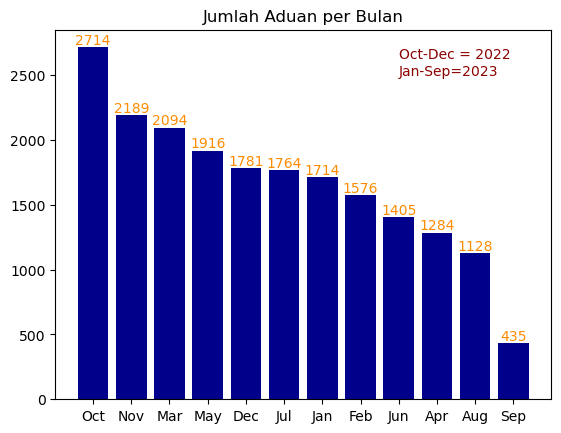

In [107]:
bulan_bar_df = pd.DataFrame({'Bulan':per_bulan.index, 'Jumlah Aduan':per_bulan.values})
bar_plot = plt.bar(bulan_bar_df['Bulan'], height= bulan_bar_df['Jumlah Aduan'], color="darkblue")
plt.bar_label(bar_plot, labels=bulan_bar_df['Jumlah Aduan'], label_type = 'edge',color='darkorange')
plt.title("Jumlah Aduan per Bulan")
plt.annotate('Oct-Dec = 2022 \nJan-Sep=2023', xy=[8,2500], color='darkred')
plt.show()

B. Mengetahui berapa banyak aduan per kota/kabupaten di jawa tengah dalam periode waktu tertentu.

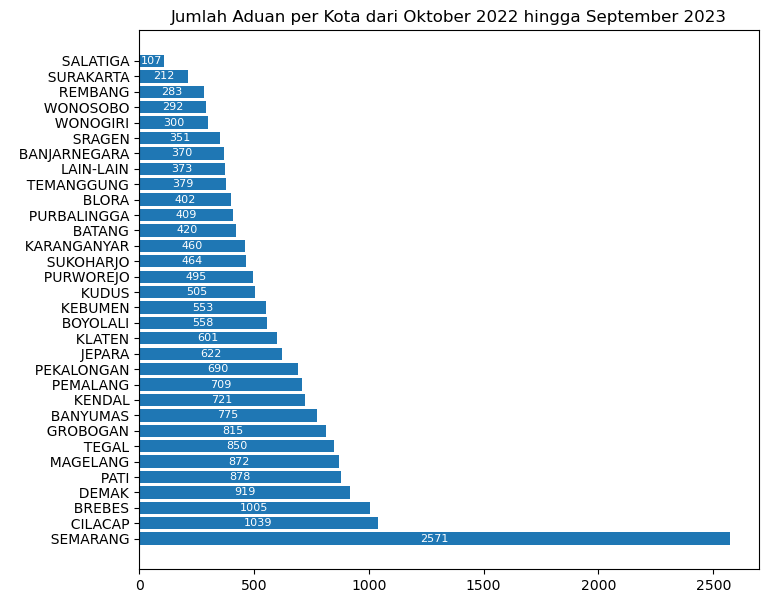

In [163]:
fig = plt.figure(figsize=(8,7))
dataset['Kabupaten/Kota'] = dataset['Kabupaten/Kota'].str.replace(pat='KABUPATEN', repl=' ',regex=False) 
dataset['Kabupaten/Kota'] = dataset['Kabupaten/Kota'].str.replace(pat='KOTA', repl=' ',regex=False) 
kota = dataset['Kabupaten/Kota'].value_counts()
bar_kota = pd.DataFrame({'Kota':kota.index,'Jumlah':kota.values})
h_bar = plt.barh(bar_kota['Kota'],bar_kota['Jumlah'])
plt.bar_label(h_bar, labels=bar_kota['Jumlah'], label_type = 'center',color='white', size=8)
plt.title('Jumlah Aduan per Kota dari Oktober 2022 hingga September 2023')
plt.show()

C. Mengetahui rata-rata aduan per kota dan Perbulan

In [193]:
rata_rata_kota = bar_kota["Jumlah"].sum()/len(bar_kota['Kota'])
rata_rata_bulan = bulan_bar_df['Jumlah Aduan'].sum()/len(bulan_bar_df['Bulan'])

print(f"Rata-rata aduan per kota adalah {rata_rata_kota} \nRata-Rata aduan per bulan adalah {rata_rata_bulan}")

Rata-rata aduan per kota adalah 625.0 
Rata-Rata aduan per bulan adalah 1666.6666666666667


    Rata-rata aduan per kota di jawa tengah terhitung dari Oktober 2022 - September 2023 adalah = 635

D. Mengetahui persentasi aduan diselesaikan, diverivikasi, masih berjalan, atau bahkan tidak direspon dalam waktu tertentu.

In [185]:
status_count = dataset['Status'].value_counts()
status_aduan = pd.DataFrame({'Status':status_count.index,'Jumlah':status_count.values})
sum = status_aduan['Jumlah'].sum()
percentage = (status_aduan['Jumlah']/sum)*100
status_aduan['%']= round(percentage,2)
status_aduan

,Status,Jumlah,%
0,Selesai,14949,74.74
1,Verifikasi,2740,13.70
2,Progress,2242,11.21
3,Belum Direspon,69,0.34


##### Terhitung sejak Oktober 2022 - September 2023
Terdapat kurang lebih 20000 aduan dari masyarakat Jawa Tengah
74.74% aduan sudah terselesaikan
13.70% aduan sudah terverifikasi namun belum terlesaikan
11.21% aduan masih berjalan atau sudah dalam proses penyelesaian
0.34% aduan belum atau tidak direspon

### Terdapat beberapa kesimpulan berdasarkan data di atas:
1. Semarang adalah kota yang paling banyak mengadu atau melaporkan sesuatu pada pemerintah disusul cilacap dan brebes.
2. Rata-rata aduan perbulan yang mencapai angka 1666.66. Bagaimana cara pemerintah jawa-tengah menangani setiap aduan? sayangnya penganalisa tidak punya kuasa untuk mencari data lebih jauh atau memberikan kesimpulan terhadap kinerja pemerintah. Data di atas tidak cukup untuk menjawab pertanyan: apa? kenapa? bagaimana?. Hanya mampu memberikan informasi tentang berapa, dan kapan.

### Dengan dilakukannya proyek ini, penganalisa berharap:
1. Tidak ada pihak yang tersinggung sebagaimana tujuan proyek ini hanya yang tertulis di atas.
2. Analisa ini sama sekali tidak ada niatan yang bersifat menyerang, menyinggung, atau mendukung pihak manapun. 
2. Data analis senior bisa memberikan kritik dan saran terhadap penganalisa. Hubungi https://www.linkedin.com/in/ardianto407/ atau melalui email ardianto.aa70@gmail.com